# Prática 2

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere os dados de fechamento do papel VALE3 a partir de 21/07/2020 no arquivo VALE3.csv.
(fonte dos dados https://br.financas.yahoo.com/quote/VALE3.SA/history?p=VALE3.SA em Acesso em 20/07/2021)


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 2 a esses dados, a saber:

- Método de Holt

- Método de Holt-Winters

- Previsão 

- Estacionariedade


Carregue as bibliotecas

In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


**1. Faça a leitura dos dados a partir do arquivo VALE3.csv disponível no material do curso. Para essa análise, utilizaremos a variável que indica os fechamentos, Close. Quantas observações tem a série original? Visualize a série Close.**

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


246

<AxesSubplot:xlabel='Date'>

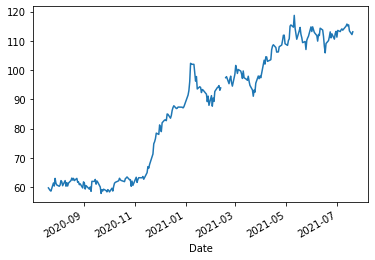

**2. Quais as datas mínima e máxima de observação da série Close? Repita o procedimento feito em aula para preencher os dados faltantes com a função VALE3.fillna(method='ffill', inplace=True). Nesse caso, a frequência usada em pd.date_range deve ser 'B' pois a bolsa de valores não funciona aos fins de semana. O que faz o método ffill de fillna?**

Timestamp('2020-07-21 00:00:00')

Timestamp('2021-07-20 00:00:00')

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', length=261, freq='B')

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [9]:
VALE3.fillna(method='ffill', inplace=True)

**3. Qual o novo número de observações da série Close após o procedimento em 2.?**

261

**4. Vamos aplicar os métodos de Holt e Holt-Winters para esses dados. Faça a leitura das bibliotecas necessárias e crie a série Holt na base de dados. Atribua a ela os valores ajustados pelo Método de Holt. Lembre-se que a série fica deslocada e corrija com a função shift(-1).**

,Open,High,Low,Close,Adj Close,Volume,Holt
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509


**5. Visualize as séries Close e Holt. O método apresenta um bom ajuste?**

<AxesSubplot:>

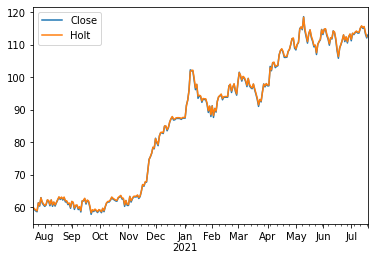

**6. Faz sentido ajustar o método de Holt-Winters? Qual seria o período da sazonalidade? 5 dias pode fazer sentido? Aplique os métodos de Holt-Winters com sazonalidade aditiva e multiplicativa e visualize os resultados.**

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926,59.616663
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450,59.977291
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476,59.401907
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459,59.001608
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509,59.119881


<AxesSubplot:>

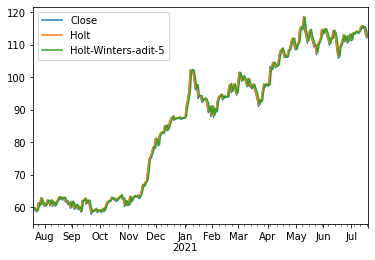

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5,Holt-Winters-mul-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926,59.616663,59.618640
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450,59.977291,59.947437
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476,59.401907,59.454810
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459,59.001608,59.028068
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509,59.119881,59.028411


<AxesSubplot:>

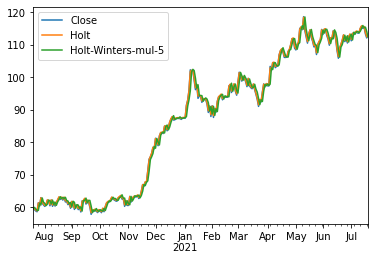

**7. Olhe as previsões para as últimas 40 observações**

<AxesSubplot:>

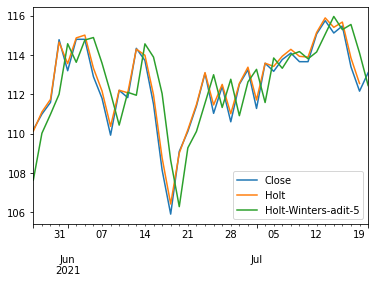

**8. Como ficam as previsões? Use 240 observações para treino e 21 para teste.**

240

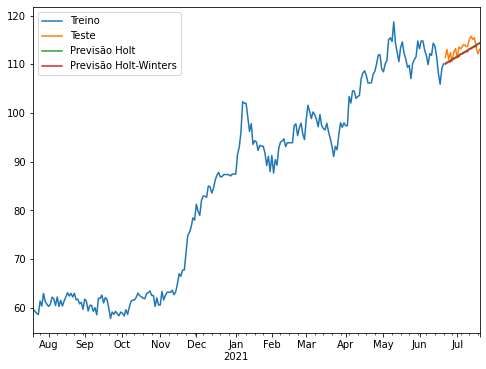

**9. É possível melhorar as previsões com o método de Holt-Winters com sazonalidade e/ou tendência multiplicativos?**

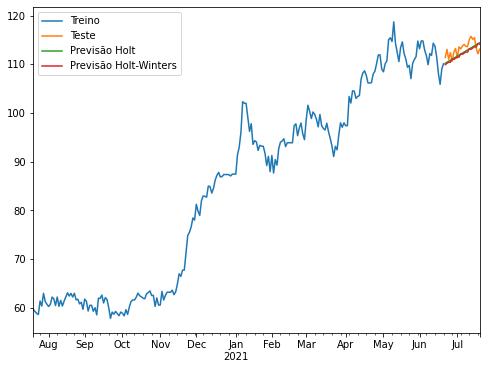

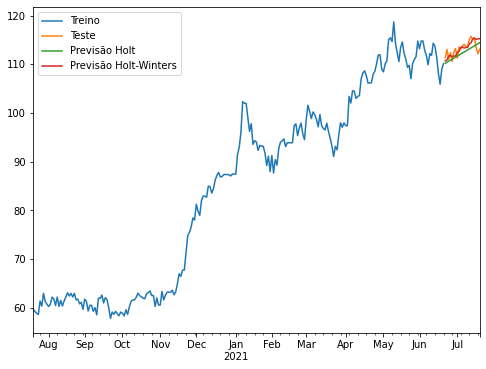

**10. Utilize os métodos de Holt e Holt-Winters e compare os erros quadráticos médios e erros absolutos médios. (Depois você pode repetir para os dados de COVID-19).**

1.5510073248112721

0.9834965730885714

2.2203382325847345

1.357584899793082

**11. Crie séries da média móvel simples e desvio padrão móvel com janelas de 5 dias. A série parece estacionária?**

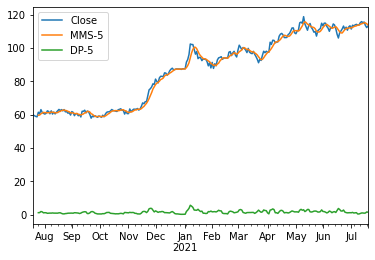

A série não parece estacionária.

**12. A série das primeiras diferenças parece estacionária?.**

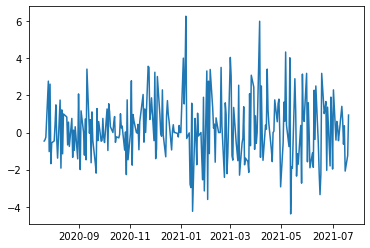

**13. Considere boxplots semanais para a série original. Ela parece estacionária?**

<AxesSubplot:xlabel='Mês de observação', ylabel='Close'>

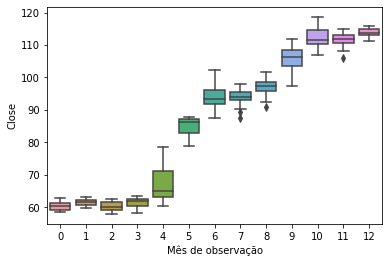

In [30]:
import seaborn as sns


VALE3['Mês de observação'] = (VALE3.index.month + (VALE3.index.year - VALE3.index.min().year)*12) - VALE3.index.min().month 

sns.boxplot(x=VALE3['Mês de observação'], y=VALE3['Close'])

**14. Utilize o Teste de Dickey-Fuller aumentado. Que evidências ele dá sobre a estacionariedade da série e da primeira diferença?**

ADF Statistic: -0.758537
p-value: 0.830999
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


ADF Statistic: -4.876273
p-value: 0.000039
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
